**Findings**

**The question is will the customer accept the coupon?**  The answer is that a customer will accept a coupon **56.93%** of the time.  Many factors influence acceptance, one of which is the type of coupon they receive.  As shown in plot below, Coupon Acceptance Rates By Coupon Type, the acceptance rate varies between 41.19% for **Bar Coupons** to 73.77% for **Carry Out and Take Away** coupons.

Most of my analysis in this notebook focused on understanding acceptance rates for Bar coupons.   I found that the acceptance rate, **41.19%** increased significantly based on how frequently the customer visits bars.   Specifically, if a customer frequented a bar one or more times a month, the acceptance rate rose to **68.53%**.  Other factors such as age, occupation and number of passengers in the car were not as impactful to acceptance rate as was bar visit frequency per month.


![Coupon Acceptance Rates](data/coupon_acceptance_rates.png)

Additionally, the Coffee House Coupon data was analyzed.

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons - less expensive restaurants, under $20, coffee houses, carry out and take away, etc.




**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.






### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [376]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [377]:
data = pd.read_csv('data/coupons.csv')

In [378]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**1a.  Let's review the counts by column**

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

**From above, we can see that some columns have missing data**

2. Investigate the dataset for missing or problematic data.

2a. At quick glance, most of the data in the **car** column is missing, we only have 108 entries out of 12684 rows, let's examine that for a moment.

In [380]:
data["car"].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

In [381]:
data["car"].isnull().sum()

12576

Now, let's examine the entire dataset, ordered from most scarcest column data to complete, to evalue the remaining columns that are missing rows.  

In [382]:
data.isnull().sum().sort_values(ascending=False)

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
destination                 0
passanger                   0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
occupation                  0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

It appears that the column **car** is referring to the customer's car ownership/preferences.   The data is so scarce we can **drop** this column.

In [383]:
data_mod= data.copy() # make a copy of the original data fram before we begin our mods
# now drop the car column.
data_mod = data_mod.drop('car', axis=1)


Beyond **car**, the column with the most missing data (rows) is **CoffeeHouse** with 217 missing rows.  Given the max row count of 12684, **CoffeeHouse** missing data represents only approximately 1.7% of the dataset and since the missing data in columns  (**Restaurant20To50, CarryAway, RestaurantLessThan20**, and **Bar**) is even less, we will drop all null values in these columns - **CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20**, and **Bar**.  Let's also correct the spelling of the passanger column to be **passenger**.

In [384]:
data_mod = data_mod.dropna( subset=['CoffeeHouse','Restaurant20To50','CarryAway','RestaurantLessThan20', 'Bar'])
# Correct the passanger column
data_mod = data_mod.rename(columns={'passanger': 'passenger'})

data_mod.isnull().sum().sort_values(ascending=False)


destination             0
income                  0
direction_opp           0
direction_same          0
toCoupon_GEQ25min       0
toCoupon_GEQ15min       0
toCoupon_GEQ5min        0
Restaurant20To50        0
RestaurantLessThan20    0
CarryAway               0
CoffeeHouse             0
Bar                     0
occupation              0
passenger               0
education               0
has_children            0
maritalStatus           0
age                     0
gender                  0
expiration              0
coupon                  0
time                    0
temperature             0
weather                 0
Y                       0
dtype: int64

In [385]:
data_mod.head(5)

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [386]:
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passenger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



**ANSWER: 56.93%** Details below.

4.1 Per the question, above, let's used the clean dataset to see what **% of the coupons were accepted**, Y=1.

In [387]:
# Count how many rows have Y=1
accepted = (data_mod['Y'] == 1).sum()

# Total rows
total = len(data_mod)

# Percentage
percent = accepted / total * 100

print(f"Coupons Accepted: {accepted}, Total Coupons Sent: {total}, Percent Accepted: {percent:.2f}%")


Coupons Accepted: 6877, Total Coupons Sent: 12079, Percent Accepted: 56.93%


Here's a visualization of coupons accepted vs not accepted.

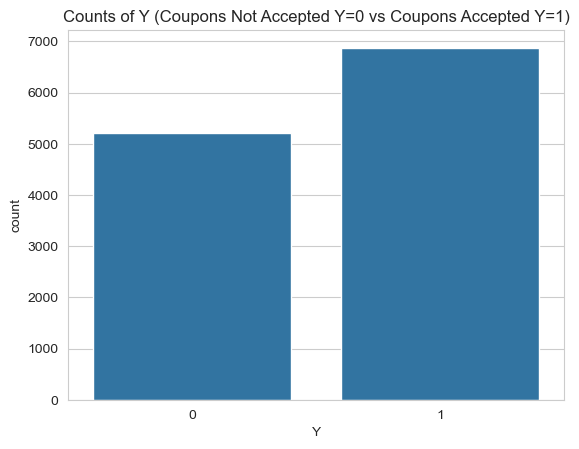

In [388]:
# Simple bar plot of coupon acceptance, Y = 0 not accepted, Y = 1, accepted
sns.countplot(x='Y', data=data_mod)
plt.title('Counts of Y (Coupons Not Accepted Y=0 vs Coupons Accepted Y=1)')
plt.show()

**Here's a better visualization, with Y = 1, coupon acceptance being set to green**

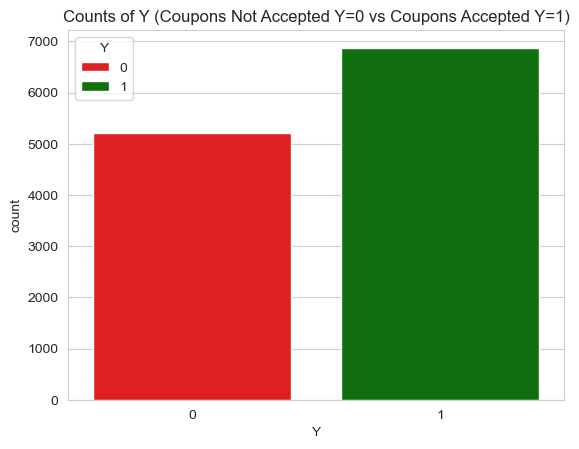

In [389]:
# Define red for non-acceptance, green for acceptance
palette_colors = {0: "red", 1: "green"}

sns.countplot(x='Y', data=data_mod, hue = "Y", palette = palette_colors)
plt.title('Counts of Y (Coupons Not Accepted Y=0 vs Coupons Accepted Y=1)')
plt.show()


5. Use a bar plot to visualize the `coupon` column.

In [390]:
# Unique entries with counts
print(data_mod['coupon'].value_counts())

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64


Now that I understand the count, I can then visualize.

/var/folders/6z/sjs790c57t14_7_jv0jzgpkh0000gp/T/ipykernel_1513/2196793826.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='coupon', data=data_mod,palette='Set1') # I got lots of suggestions from Pycharm to improve on this line, but leaving for now


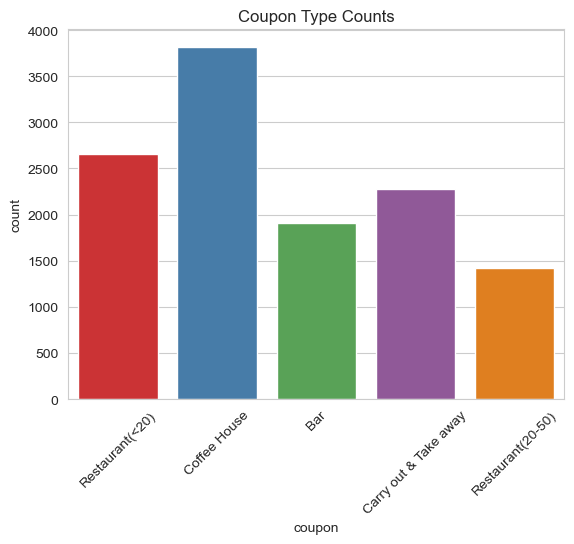

In [391]:
sns.countplot(x='coupon', data=data_mod,palette='Set1') # I got lots of suggestions from Pycharm to improve on this line, but leaving for now
plt.title('Coupon Type Counts')
# the labels collide, so let's make them 45 degrees
plt.xticks(rotation=45)  # rotate labels if they overlap
plt.show()


Given the plot above, it's probably a good time to see what correlation these coupon categories have with coupon acceptance, Y = 1. Let's start with a hue of Y again, anc color counts within each category by Y = 0, non acceptance, and Y= 1 acceptance.

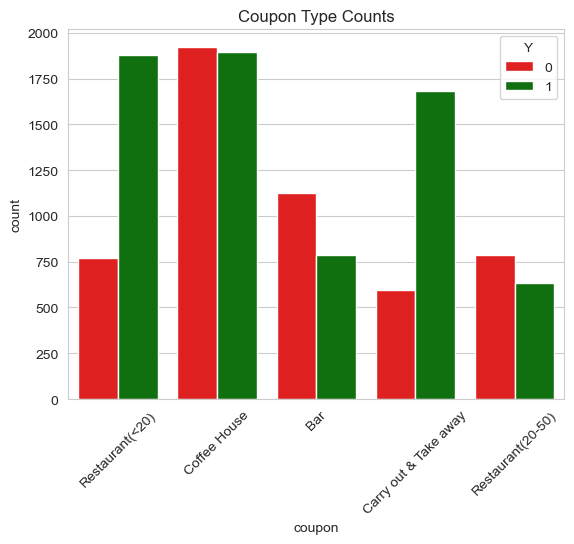

In [392]:
sns.countplot(x='coupon', hue = "Y", data=data_mod,palette= palette_colors) # I got lots of suggestions from Pycharm to improve on this line, but leaving for now
plt.title('Coupon Type Counts')
# the labels collide, so let's make them 45 degrees
plt.xticks(rotation=45)  # rotate labels if they overlap
plt.show()


6. Use a histogram to visualize the temperature column.

/var/folders/6z/sjs790c57t14_7_jv0jzgpkh0000gp/T/ipykernel_1513/4261162071.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='temperature', data=data_mod,palette='Set1') # I got lots of suggestions from Pycharm to improve on this line, but leaving for now


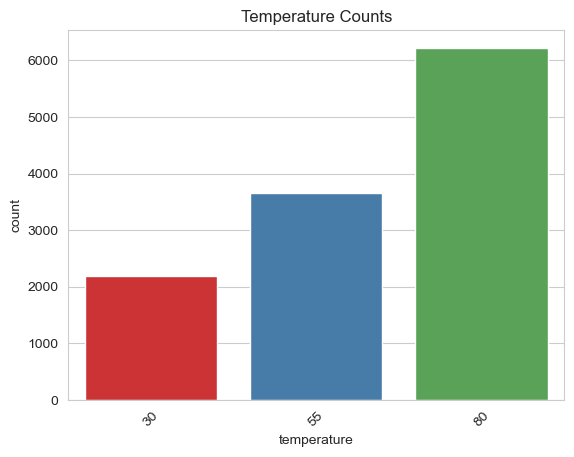

In [393]:
# using code from above
sns.countplot(x='temperature', data=data_mod,palette='Set1') # I got lots of suggestions from Pycharm to improve on this line, but leaving for now
plt.title('Temperature Counts')
# the labels collide, so let's make them 45 degrees
plt.xticks(rotation=45)  # rotate labels if they overlap
plt.show()

From our visualization work on coupon category, let's apply the same visualization of acceptance to temperature

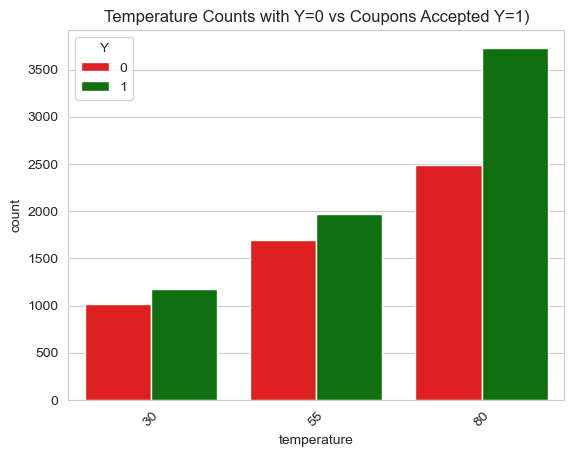

In [394]:
sns.countplot(x='temperature', hue = "Y", data=data_mod,palette= palette_colors) # I got lots of suggestions from Pycharm to improve on this line, but leaving for now
plt.title('Temperature Counts with Y=0 vs Coupons Accepted Y=1)')
# the labels collide, so let's make them 45 degrees
plt.xticks(rotation=45)  # rotate labels if they overlap
plt.show()


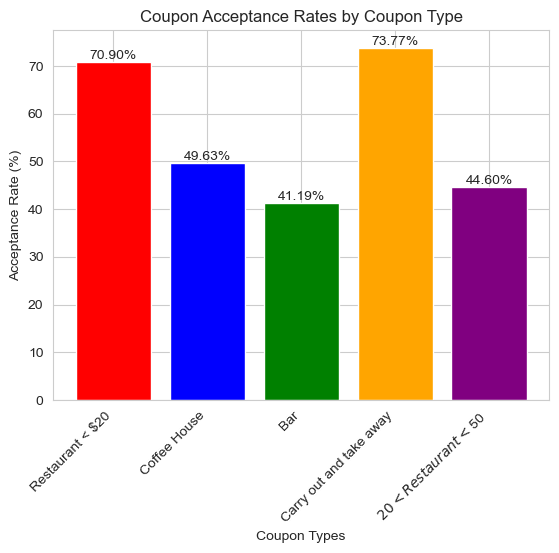

In [395]:
# this code was developed above.  I repeat use the above code to develop a simple bar chart showing
# acceptance rate for each coupon type

import os


cheap_rest = data_mod[(data_mod['coupon'].isin(["Restaurant(<20)"]))]
cheap_rest_rate = (cheap_rest['Y'] == 1).mean()*100
coffee_house = data_mod[(data_mod['coupon'].isin(["Coffee House"]))]
coffee_house_rate = (coffee_house['Y'] == 1).mean()*100
bar = data_mod[(data_mod['coupon'].isin(["Bar"]))]
bar_rate = (bar['Y'] == 1).mean()*100
carry_out = data_mod[(data_mod['coupon'].isin(["Carry out & Take away"]))]
carry_out_rate = (carry_out['Y'] == 1).mean()*100
exp_rest = data_mod[(data_mod['coupon'].isin(["Restaurant(20-50)"]))]
exp_rest_rate = (exp_rest['Y'] == 1).mean()*100
# let's plot the rates side by side
# Put them into a list

# Put them into a list

values = [cheap_rest_rate, coffee_house_rate, bar_rate, carry_out_rate, exp_rest_rate]
labels = ['Restaurant < $20', 'Coffee House', 'Bar', 'Carry out and take away', ' $20 < Restaurant < $50 ']
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=colors)

ax.set_ylabel("Acceptance Rate (%)")
ax.set_xlabel("Coupon Types")
ax.set_title("Coupon Acceptance Rates by Coupon Type")
plt.xticks(rotation=45, ha='right')

# Add labels automatically
ax.bar_label(bars, fmt="%.2f%%")

os.makedirs("data", exist_ok=True)
plt.savefig("data/coupon_acceptance_rates.png", bbox_inches="tight")

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [396]:
data_bar_coupons = data_mod[data_mod['coupon'] == "Bar"].copy() #keep only the rows where coupon = 'Bar'


2. What proportion of bar coupons were accepted?


**ANSWER = 41.19%**, see details below.

In [397]:
# This is a copy of the code above, but with data_mod replaced with data_bar_coupons

# Count how many rows have Y=1
accepted = (data_bar_coupons['Y'] == 1).sum()

# Total rows
total = len(data_bar_coupons)

# Percentage
percent = accepted / total * 100

print(f"Bar Coupons Accepted: {accepted}, Total Bar Coupons Sent: {total}, Percent Accepted: {percent:.2f}%")

Bar Coupons Accepted: 788, Total Bar Coupons Sent: 1913, Percent Accepted: 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [398]:
data_bar_coupons["Bar"].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

From the count above and the question, we need to sum counts for **never, less1 and 1-3** in *total*, and for when *Y=1*.  That will give us the acceptance
rate for this group.  For the second acceptance calculation we need to sum counts for **4-8, and gt8**, and for when *y=1*.  That will give us the acceptance rate of the second group. Then we can compare.



In [399]:
# Count rows where Bar is one of the three values for first group
total_three_or_less_trips = (data_bar_coupons['Bar'].isin(["less1", "never", "1~3"])).sum()
total_three_or_less_trips


1720

In [400]:
# count rows where Bar is one of three values AND Y = 1 (accepted)
accepted_when_three_or_less_trips = (
    (data_bar_coupons['Bar'].isin(["less1", "never", "1~3"])) &
    (data_bar_coupons['Y'] == 1)
).sum()
accepted_when_three_or_less_trips

641

In [401]:
acceptance_rate_when_three_or_less_trips = (accepted_when_three_or_less_trips / total_three_or_less_trips)*100
acceptance_rate_when_three_or_less_trips
print(f"Acceptance Rate for Three or Less Bar Trips Per Month: {acceptance_rate_when_three_or_less_trips:.2f}%")


Acceptance Rate for Three or Less Bar Trips Per Month: 37.27%


Now use the code above to calculate acceptance rate for second group , **4-8, and gt8**

In [402]:
# Count rows where Bar is one of the two values 4-8 and gt8
total_four_or_more_trips = (data_bar_coupons['Bar'].isin(["4~8", "gt8"])).sum()
total_four_or_more_trips


193

In [403]:
# Count rows where Bar is one of the two values 4-8 and gt8 and Y=1 (accepted coupons)
accepted_when_four_or_more_trips = (
    (data_bar_coupons['Bar'].isin(["4~8", "gt8"])) &
    (data_bar_coupons['Y'] == 1)
).sum()
accepted_when_four_or_more_trips

147

In [404]:
acceptance_rate_when_four_or_more_trips = (accepted_when_four_or_more_trips/ total_four_or_more_trips)*100
acceptance_rate_when_four_or_more_trips
print(f"Acceptance Rate for Four or More Bar Trips Per Month: {acceptance_rate_when_four_or_more_trips:.2f}%")

Acceptance Rate for Four or More Bar Trips Per Month: 76.17%


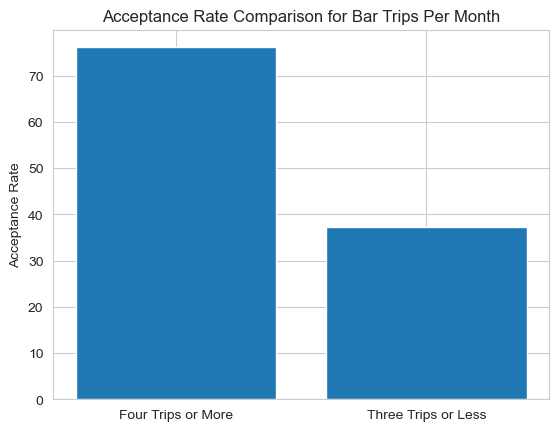

In [405]:
# Simple bar plot
plt.bar(['Four Trips or More', 'Three Trips or Less'], [acceptance_rate_when_four_or_more_trips, acceptance_rate_when_three_or_less_trips])

plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate Comparison for Bar Trips Per Month')
plt.show()

As indicated by the graph above, if the customer goes to a bar **Four Trips or More** the coupon acceptance rate is **76.17%**
whereas if the customer goes to a bar **Three Trips or Less** per month, the acceptance rate is **37.27%**.  The acceptance rate is more than **2X** between the two groups of customers.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


**ANSWER = The acceptance rate for the first group is 68.98%.  The acceptance rate for the rest of the bar coupon customers is 33.77% See details below.**

In [406]:
data_bar_coupons["age"].value_counts()

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64

In [407]:
# first find customers who go to the bar more than once and are over the age of 25
total_more_than_one_trip_over25 = (data_bar_coupons['Bar'].isin(["1~3","4~8", "gt8"]) & data_bar_coupons['age'].isin(["26","31","36","41","46","50plus"] )).sum()
total_more_than_one_trip_over25

403

In [408]:
accepted_more_than_one_trip_over25 = (data_bar_coupons['Bar'].isin(["1~3","4~8", "gt8"]) & data_bar_coupons['age'].isin(["26","31","36","41","46","50plus"]) &   (data_bar_coupons['Y'] == 1 )).sum()
accepted_more_than_one_trip_over25

278

In [409]:
acceptance_rate_more_than_one_trip_over25 = (accepted_more_than_one_trip_over25/ total_more_than_one_trip_over25)*100
acceptance_rate_when_four_or_more_trips
print(f"Acceptance Rate for More than One Trip Per Month & Over 25: {acceptance_rate_more_than_one_trip_over25:.2f}%")

Acceptance Rate for More than One Trip Per Month & Over 25: 68.98%


Let this group be group1.   Let group2 be the rest of the dataset, in other words we want to compute the acceptance rate for the remaining rows.  From doing some research the cleanest way to set that group apart is to drop the first group using its index. To do this we need the dataframe for our first group calculation.

In [410]:

# set a mask, equal true for this condition
mask = (
    (data_bar_coupons['Bar'].isin(["1~3","4~8", "gt8"])) &
    (data_bar_coupons['age'].isin(["26","31","36","41","46","50plus"]))
)
# create new data frame for group 1
group1 = data_bar_coupons[mask]
# now create new df for group 2, which is the rest of the rows in the data_bar_coupons df
group2 = data_bar_coupons.drop(group1.index)
# now get the total rows in that group
group2_total = len(group2)

# now identify those in group 2 that accepted the coupon
group2_acceptance = (group2["Y"]== 1).sum()

group2_acceptance_rate = (group2_acceptance/group2_total)*100
print(f"Here's the acceptance rate for those customers not in group1, in group 2 : {group2_acceptance_rate:.2f}%")

Here's the acceptance rate for those customers not in group1, in group 2 : 33.77%


In [411]:
# using the code above, I googled if there was a simpler way to compute acceptance rate.
# the concept below is cleaner than my implementation, more compact
# first compute group1 based on logic in this group AND in this group as new df named group1
group1 = data_bar_coupons[
    (data_bar_coupons['Bar'].isin(["1~3","4~8","gt8"])) &
    (data_bar_coupons['age'].isin(["26","31","36","41","46","50plus"]))
]

# then drop group1 rows using the drop index code below, that yields the rest of the group
group2 = data_bar_coupons.drop(group1.index)
#now the part I didn't initially see, since we are after total accepts / the total rows, taking the mean of the 0 rows and 1 rows ie equivalent to
# the calculations I did above, where I used the len method to get the total.  The mean does the job in more compact code
# this was not immediately apparent, but I like this approach
rate1 = (group1['Y'] == 1).mean()*100
rate2 = (group2['Y'] == 1).mean()*100

#verify these results with my calculations above,
print("Group 1 acceptance rate:", rate1)
print("Group 2 acceptance rate:", rate2)

Group 1 acceptance rate: 68.98263027295285
Group 2 acceptance rate: 33.77483443708609


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


**ANSWER**
Group 3 acceptance rate - goes to bars more than once per month: **68.53%**,
Group 4 acceptance rate - had passengers there were not a kid: **48.62%**,
Group 5 acceptance rate - had occupations other than farm fishing and forestry: **41.18%**,
see details below.

The question above needed a bit of clarity, so here's what I'm comparing.  Compare coupon acceptance rate for customers who received bar coupons, group3 = go to bars more than once a month, to group4 = had passengers there were not a kid, to group 5 who had occupations other than farm, fishing, forestry. I will use the compact code above to compute acceptance for each group

In [412]:
group3 = data_bar_coupons[(data_bar_coupons['Bar'].isin(["1~3","4~8","gt8"]))]
rate3 = (group3['Y']==1).mean()*100
#let's first review the value count of this column to we can setup the appropriate df
group4 = data_bar_coupons['passenger'].value_counts()
group4
# from this we want the group isin Friends(s) and Partner, this will exclude Alone, and Kids(s)
group4 = data_bar_coupons[(data_bar_coupons['passenger'].isin(["Friend(s)","Partner"]))]
rate4 = (group4['Y']==1).mean()*100
rate4
# now let's review the value count for the occupation column
group5 = data_bar_coupons['occupation'].value_counts()
group5
# from reviewing this group, we'll grab the isin method for Farming Fishing & Forestry,
# then drop the those rows from the df data_bar_coupons
farming_fishing_forestry = data_bar_coupons[(data_bar_coupons['occupation'].isin(["Farming Fishing & Forestry"]))]
farming_fishing_forestry["occupation"].value_counts()
group5 = data_bar_coupons.drop(farming_fishing_forestry.index)
group5["occupation"].value_counts()
rate5 = (group5['Y']==1).mean()*100
rate5
print(
    f"Group 3 acceptance rate - goes to bars more than once per month: {rate3:.2f}%\n"
    f"Group 4 acceptance rate - had passengers there were not a kid: {rate4:.2f}%\n"
    f"Group 5 acceptance rate - had occupations other than farm fishing and forestry: {rate5:.2f}%"
)


Group 3 acceptance rate - goes to bars more than once per month: 68.53%
Group 4 acceptance rate - had passengers there were not a kid: 48.62%
Group 5 acceptance rate - had occupations other than farm fishing and forestry: 41.18%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



**ANSWER**, Group 6 acceptance rate - goes to bar more than once a month, had passengers there were not a kid, and not widowed- : **71.43%**

Group 7 acceptance rate - goes to bar more than once a month and under the age of 30: **71.95%**

Group 8 acceptance rate - goes to cheap restraunts more than 4 times a month with income less than 50K: **45.65%**, see details below.

Let's start with just defining the first group as 6, the second as group 7, and the last group as group 8 to distinguish from the work above.

In [413]:
#first exlore marital status group, then we can and it in
group6 = data_bar_coupons["maritalStatus"].value_counts()
group6 = data_bar_coupons[
    (data_bar_coupons['Bar'].isin(["1~3","4~8","gt8"])) &
    (data_bar_coupons['passenger'].isin(["Friend(s)","Partner"])) &
    (data_bar_coupons['maritalStatus'].isin(["Married partner","Single","Unmarried partner","Divorced"]))
]
rate6 = (group6['Y']==1).mean()*100
group7 = data_bar_coupons["age"].value_counts()
group7
group7 = data_bar_coupons[
    (data_bar_coupons['Bar'].isin(["1~3","4~8","gt8"])) &
   (data_bar_coupons['age'].isin(["below21","21","26"]))
]
rate7 = (group7['Y']==1).mean()*100
#rate7
#data_bar_coupons.info()
#data_bar_coupons["income"].value_counts()

#4~8, and gt8 for RestaurantLessThan20
#for income, Less than $12500, $12500 - $24999, $25000 - $37499, $37500 - $49999

group8 = data_bar_coupons[
    (data_bar_coupons['RestaurantLessThan20'].isin(["4~8","gt8"])) &
  (data_bar_coupons['income'].isin(["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"]))
]
rate8 = (group8['Y']==1).mean()*100
rate8
print(
    f"Group 6 acceptance rate - goes to bar more than once a month, had passengers there were not a kid, and not widowed- : {rate6:.2f}%\n"
    f"Group 7 acceptance rate - goes to bar more than once a month and under the age of 30: {rate7:.2f}%\n"
    f"Group 8 acceptance rate - goes to cheap restraunts more than 4 times a month with income less than 50K: {rate8:.2f}%"
)

Group 6 acceptance rate - goes to bar more than once a month, had passengers there were not a kid, and not widowed- : 71.43%
Group 7 acceptance rate - goes to bar more than once a month and under the age of 30: 71.95%
Group 8 acceptance rate - goes to cheap restraunts more than 4 times a month with income less than 50K: 45.65%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**ANSWER** - The best indicator for coupoon acceptance for bar coupons is **how many times the customer goes to a bar per month**.  Specifically, if a customer goes to a bar more than once per month, he/she will accept the coupon at a rate of rate3 above, or at a rate of 68.53%.  Gathering this information for a marketing campaign would be important.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [414]:
data_mod['coupon'].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

The Coffee House group might be interesting, my suspicion is that number of times the customer goes to a coffee house per
month may be a strong predictor of acceptance.

In [415]:
#let drop all the other data_mod df info to examine this type of coupon
coffee_coupons = data_mod[data_mod['coupon'] == "Coffee House"].copy()
len(coffee_coupons)

3816

In [416]:
#now let's look at the acceptance rate based on customer visits to a coffee shop/house
coffee_coupons['CoffeeHouse'].value_counts()
#lets examine acceptance rate for each group, and compare
never = coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(["never"]))]
never_rate = (never['Y']==1).mean()*100
never_rate
less_than_one = coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(["less1"]))]
less_than_one_rate = (less_than_one['Y']==1).mean()*100
one_to_three = coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(["1~3"]))]
one_to_three_rate = (one_to_three['Y']==1).mean()*100
one_to_three_rate
four_to_eight= coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(["4~8"]))]
four_to_eight_rate = (four_to_eight['Y']==1).mean()*100
four_to_eight_rate
gt_than_8= coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(["gt8"]))]
gt_than_8_rate = (gt_than_8['Y']==1).mean()*100
gt_than_8_rate
never_rate

#coffee_coupons['CoffeeHouse'].value_counts()

17.522321428571427

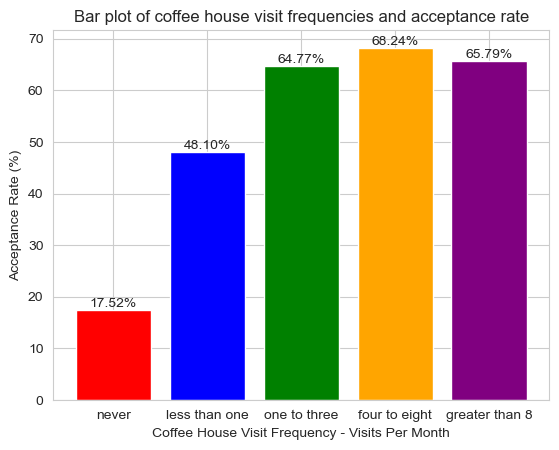

In [424]:
import matplotlib.pyplot as plt
import os

values = [never_rate, less_than_one_rate, one_to_three_rate, four_to_eight_rate, gt_than_8_rate]
labels = ['never', 'less than one', 'one to three', 'four to eight', 'greater than 8']
colors = ['red', 'blue', 'green', 'orange', 'purple']

fig, ax = plt.subplots()
bars = ax.bar(labels, values, color=colors)

ax.set_ylabel("Acceptance Rate (%)")
ax.set_xlabel("Coffee House Visit Frequency - Visits Per Month")
ax.set_title("Bar plot of coffee house visit frequencies and acceptance rate")

# Add percentage labels on top of bars
ax.bar_label(bars, fmt="%.2f%%")

# Ensure the data directory exists
os.makedirs("data", exist_ok=True)

# Save the plot to the data directory
plt.savefig("data/coffee_house_acceptance.png", bbox_inches="tight")

plt.show()


From the bar plot above, let's creat a another group that is simply greater than one

In [418]:
one_or_more = coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(["1~3", "4~8", "gt8"]))]
one_or_more_rate = (one_or_more['Y']==1).mean()*100
one_or_more_rate

65.89935760171306

Now let's replot with just the three groups


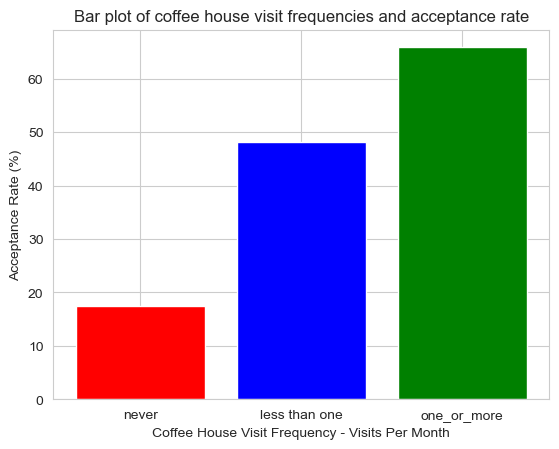

In [419]:
values = [never_rate, less_than_one_rate, one_or_more_rate]

# Create labels for each bar
labels = ['never', 'less than one', 'one_or_more']

# Define colors for each bar
colors = ['red', 'blue', 'green']

# Plot with colors
plt.bar(labels, values, color=colors)
plt.ylabel("Acceptance Rate (%)")
plt.xlabel("Coffee House Visit Frequency - Visits Per Month")
plt.title("Bar plot of coffee house visit frequencies and acceptance rate")
plt.show()

From the bar plots above, we can readily see that coffee house visit frequency is a great predictor of coffee house coupon acceptance.

Now let's examine a few other variables to see how the acceptance rate varies if we set the coffee house frequency at one or more, let's start with education



In [420]:
coffee_coupons["education"].value_counts()

education
Some college - no degree                  1328
Bachelors degree                          1276
Graduate degree (Masters or Doctorate)     587
Associates degree                          325
High School Graduate                       272
Some High School                            28
Name: count, dtype: int64

In [421]:
bs_degree = coffee_coupons[
    (coffee_coupons['CoffeeHouse'].isin(["1~3", "4~8", "gt8"])) &
  (coffee_coupons['education'].isin(["Bachelors degree"]))
]
bs_degree_rate = (bs_degree['Y']==1).mean()*100
bs_degree_rate

grad_degree = coffee_coupons[
    (coffee_coupons['CoffeeHouse'].isin(["1~3", "4~8", "gt8"])) &
  (coffee_coupons['education'].isin(["Graduate degree (Masters or Doctorate)"]))
]
grad_degree_rate = (grad_degree['Y']==1).mean()*100
grad_degree_rate

hs_diploma = coffee_coupons[
    (coffee_coupons['CoffeeHouse'].isin(["1~3", "4~8", "gt8"])) &
  (coffee_coupons['education'].isin(["High School Graduate"]))
]
hs_diploma_rate = (hs_diploma['Y']==1).mean()*100
hs_diploma_rate

some_college = coffee_coupons[
    (coffee_coupons['CoffeeHouse'].isin(["1~3", "4~8", "gt8"])) &
  (coffee_coupons['education'].isin(["Some college - no degree"]))
]
some_college_rate = (some_college['Y']==1).mean()*100
some_college_rate
grad_degree_rate

62.11340206185567

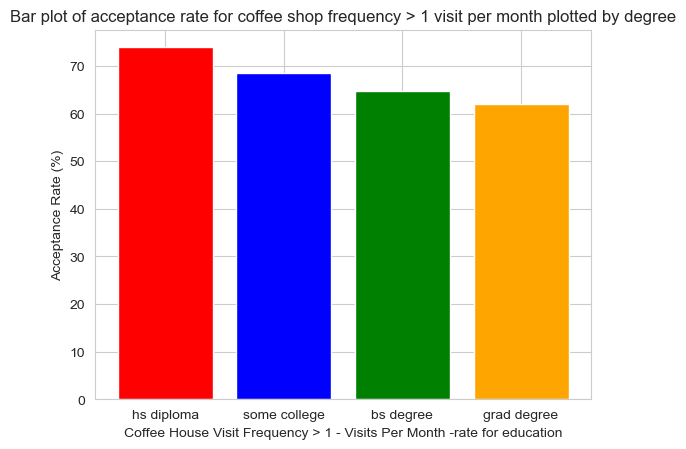

In [422]:
values = [hs_diploma_rate, some_college_rate, bs_degree_rate, grad_degree_rate]

# Create labels for each bar
labels = ['hs diploma', 'some college', 'bs degree', 'grad degree']

# Define colors for each bar
colors = ['red', 'blue', 'green', 'orange']


# Plot with colors
plt.bar(labels, values, color=colors)
plt.ylabel("Acceptance Rate (%)")
plt.xlabel("Coffee House Visit Frequency > 1 - Visits Per Month -rate for education")
plt.title("Bar plot of acceptance rate for coffee shop frequency > 1 visit per month plotted by degree")
plt.show()

**From the plot above, the trend suggest that the more education the customer has, the less likely they are to accept the coffee house coupon**